In [474]:
# Initial Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import math 
# Importing time package
import time


#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 4)

# Initialization 

In [41]:
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

In [49]:
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

# Summery Plots

In [471]:
Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date"]].groupby(["Date"]).sum()

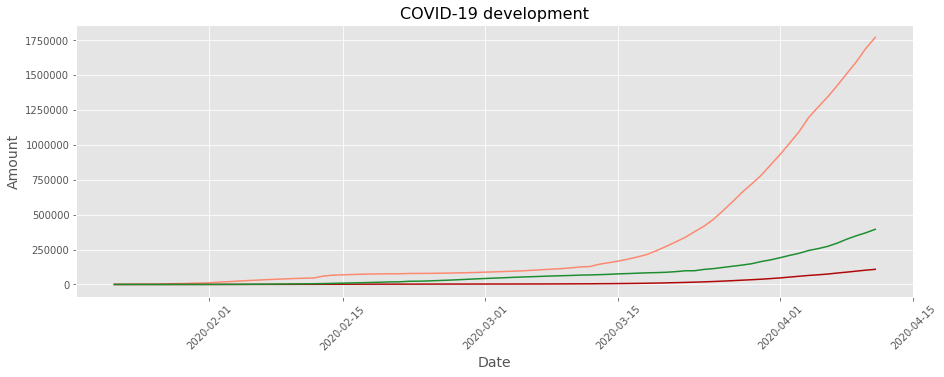

In [78]:
# Plot of COVID-19 Development
plt.figure(figsize=[15,5])
plt.title("COVID-19 development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970")
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808')
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30')
plt.xticks(rotation=45)
plt.show()

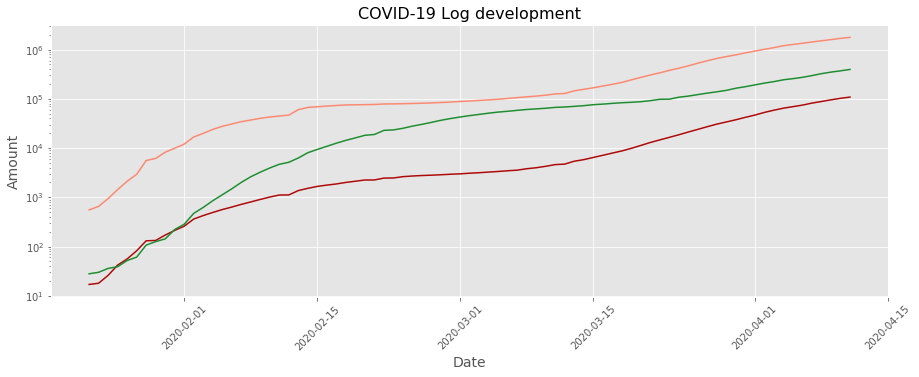

In [82]:
# Clearly exponential growth - log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Log development",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,Time_stats['Confirmed'],c="#FC8970")
plt.plot(Time_stats.index,Time_stats['Deaths'],c='#AF0808')
plt.plot(Time_stats.index,Time_stats['Recovered'],c='#1D8E30')
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

We see that #death follow #confirmed, thereby a pretty stable mortatility rate

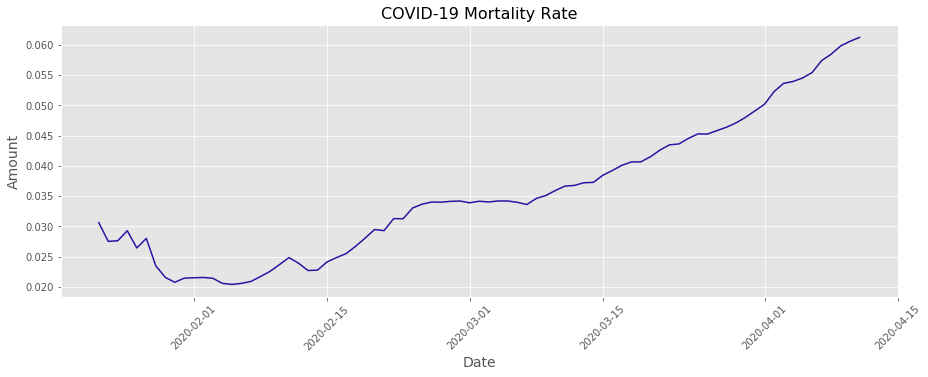

In [81]:
# Clearly exponential growth - log transformation of y axis. 
plt.figure(figsize=[15,5])
plt.title("COVID-19 Mortality Rate",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.plot(Time_stats.index,(Time_stats['Deaths']/Time_stats['Confirmed']),c="#2812A1")
plt.xticks(rotation=45)
plt.show()

Mortality rate has increased from about 3 % in march to 6 % in april ! WHY ? , less testing? collaps of healthcare?

Country wise look:

In [472]:
Country_Time_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Country/Region","Date"]).sum()
Country_Time_stats['Country'] = Country_Time_stats.index.get_level_values(0)
Country_Time_stats['Date'] = Country_Time_stats.index.get_level_values(1)

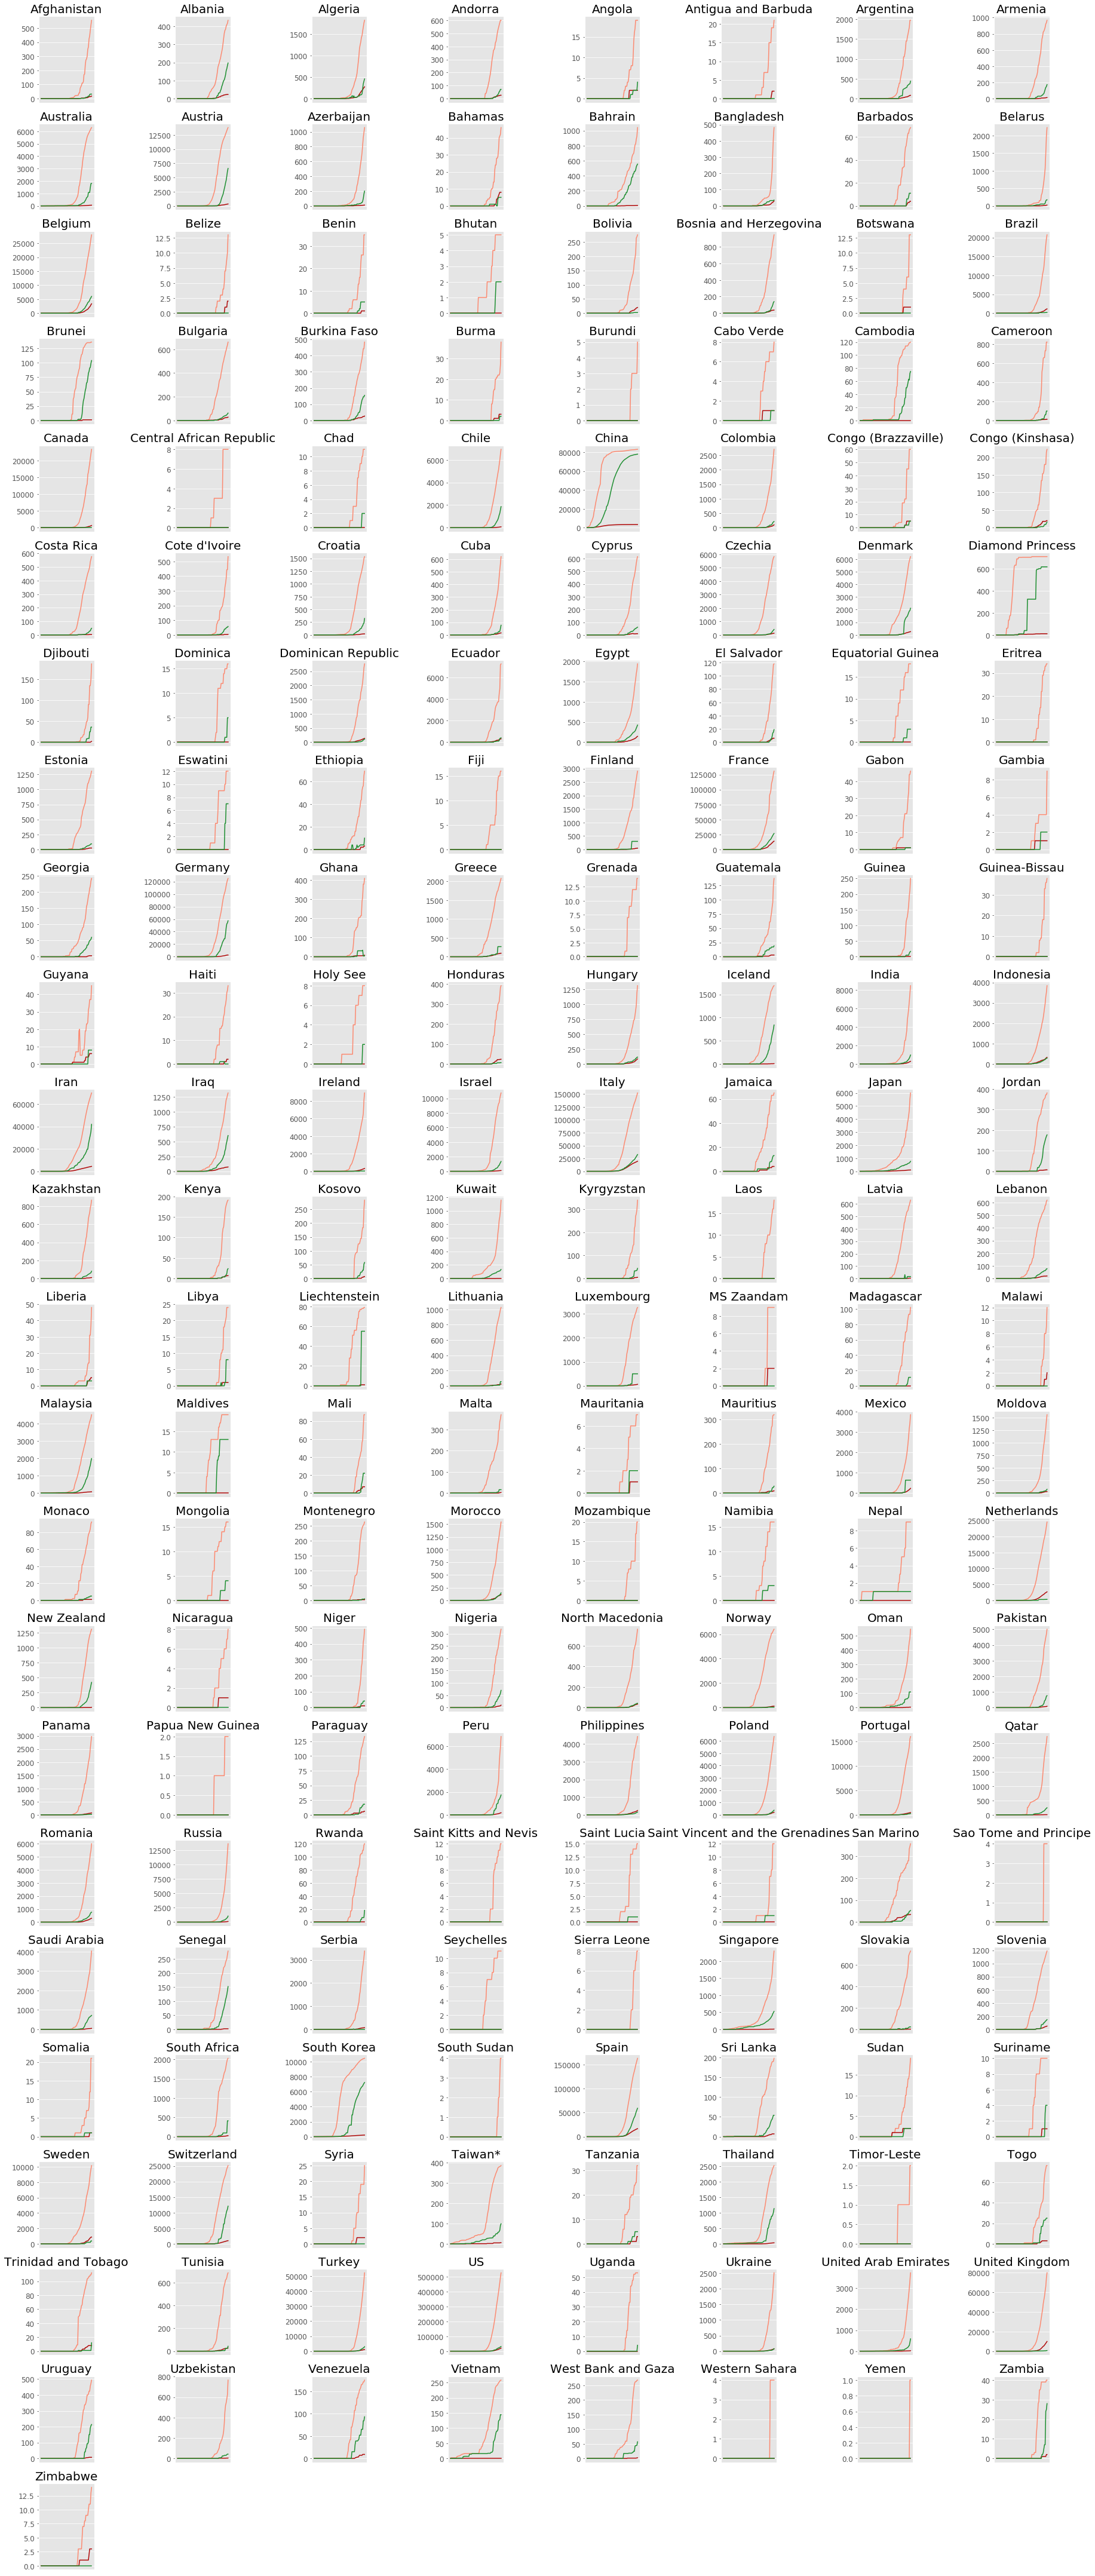

In [120]:
# Plotting COVID development for all countries. 
plt.figure(figsize=(25,60))
for i, elem in enumerate(Country_Time_stats['Country'].unique()):
    plt.subplot(24,8,i+1)
    plt.title(elem, fontsize = 20)
    temp_df = Country_Time_stats[Country_Time_stats.Country.isin([elem])]
    
    plt.plot(temp_df['Date'],temp_df['Confirmed'],c="#FC8970")
    plt.plot(temp_df['Date'],temp_df['Deaths'],c='#AF0808')
    plt.plot(temp_df['Date'],temp_df['Recovered'],c='#1D8E30')
    
    plt.yticks(fontsize = 12)
    #plt.xticks(fontsize = 20, rotation = 45)
    plt.xticks([])
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [175]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
len(Country_stats2.index.unique())

87

/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


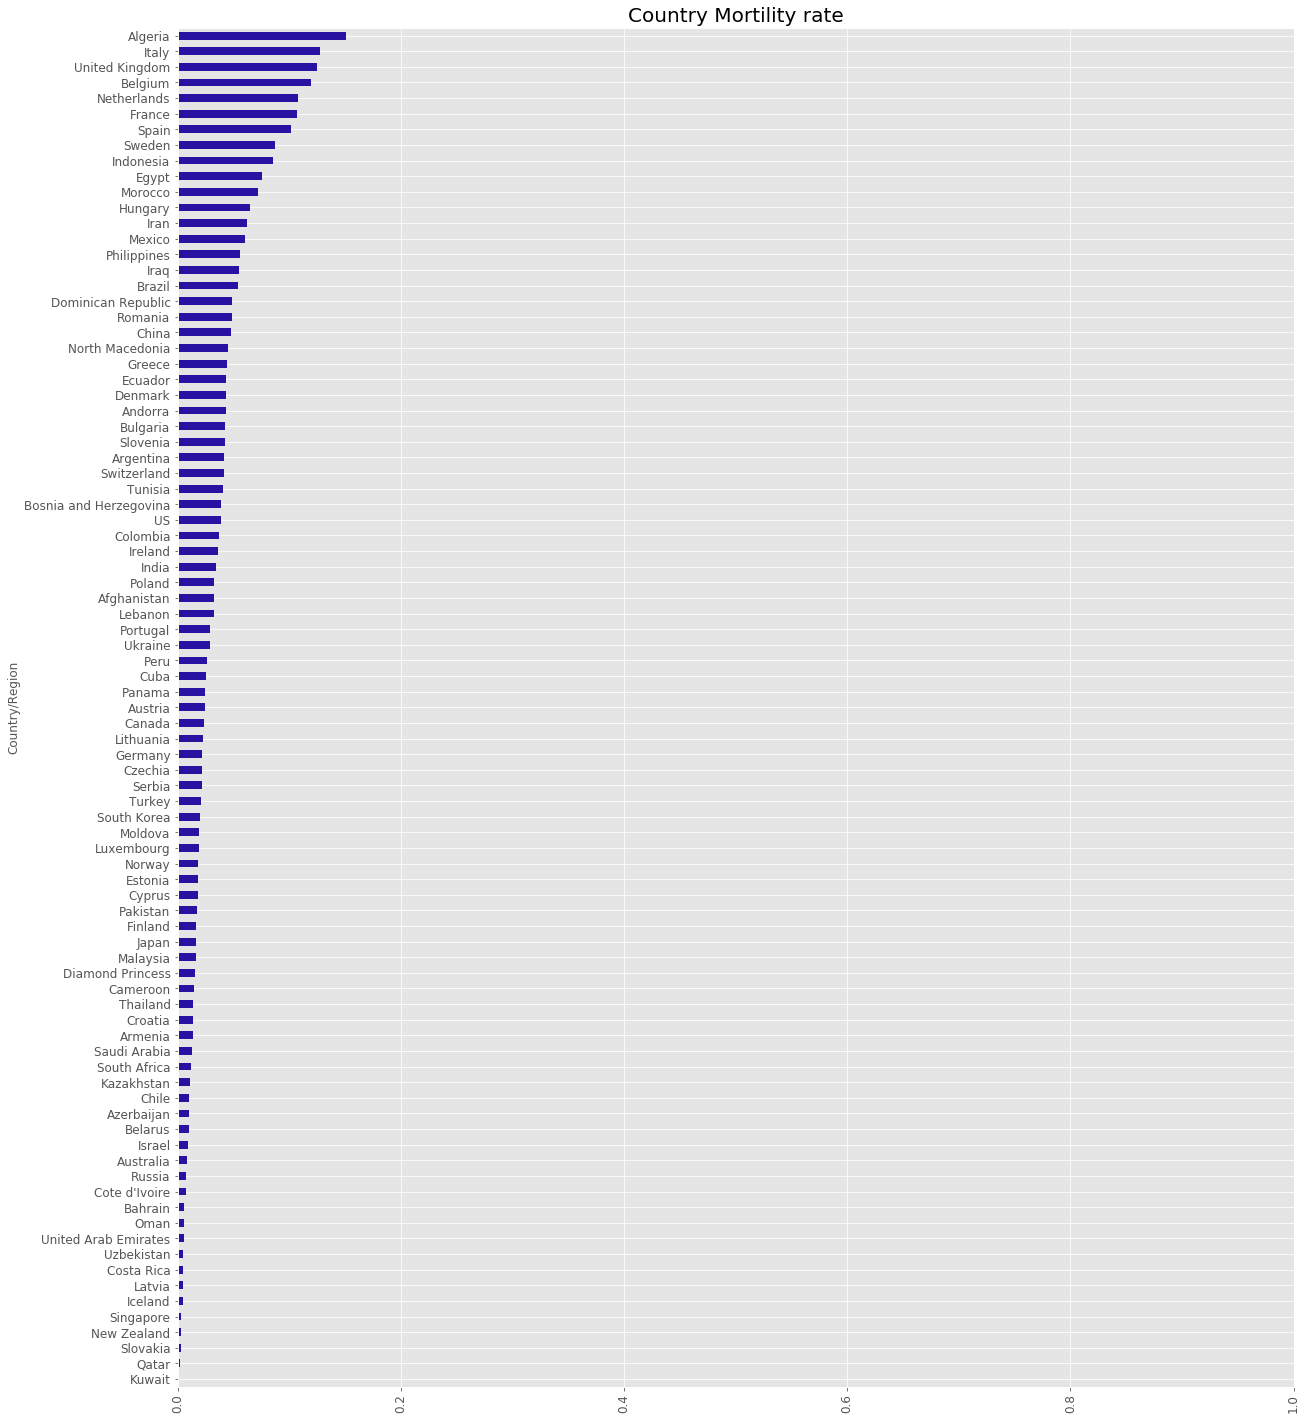

In [183]:
# Looking at mortatility rate per country. 
Country_stats = df_corona[["Confirmed","Deaths","Recovered","Country/Region"]].groupby(["Country/Region"]).max()
# filtering out all countries with less than 500 cases to remove high data uncertaintency
Country_stats2 = Country_stats[Country_stats["Confirmed"]>=500]
# Adding mortality rate to dataframe
Country_stats2['Mortalityrate'] = Country_stats2['Deaths']/Country_stats2['Confirmed']
# Sorting 
Country_stats2 = Country_stats2.sort_values(by=['Mortalityrate'], ascending=False)

#plotting the mortality rate per country wtih more than 499 confirmed cases.
plt.figure(figsize=[20,25])

plt.title('Country Mortility rate', fontsize = 20)
Country_stats2['Mortalityrate'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 90)
plt.xlim([0,1])
#plt.xlabel('')
plt.show()

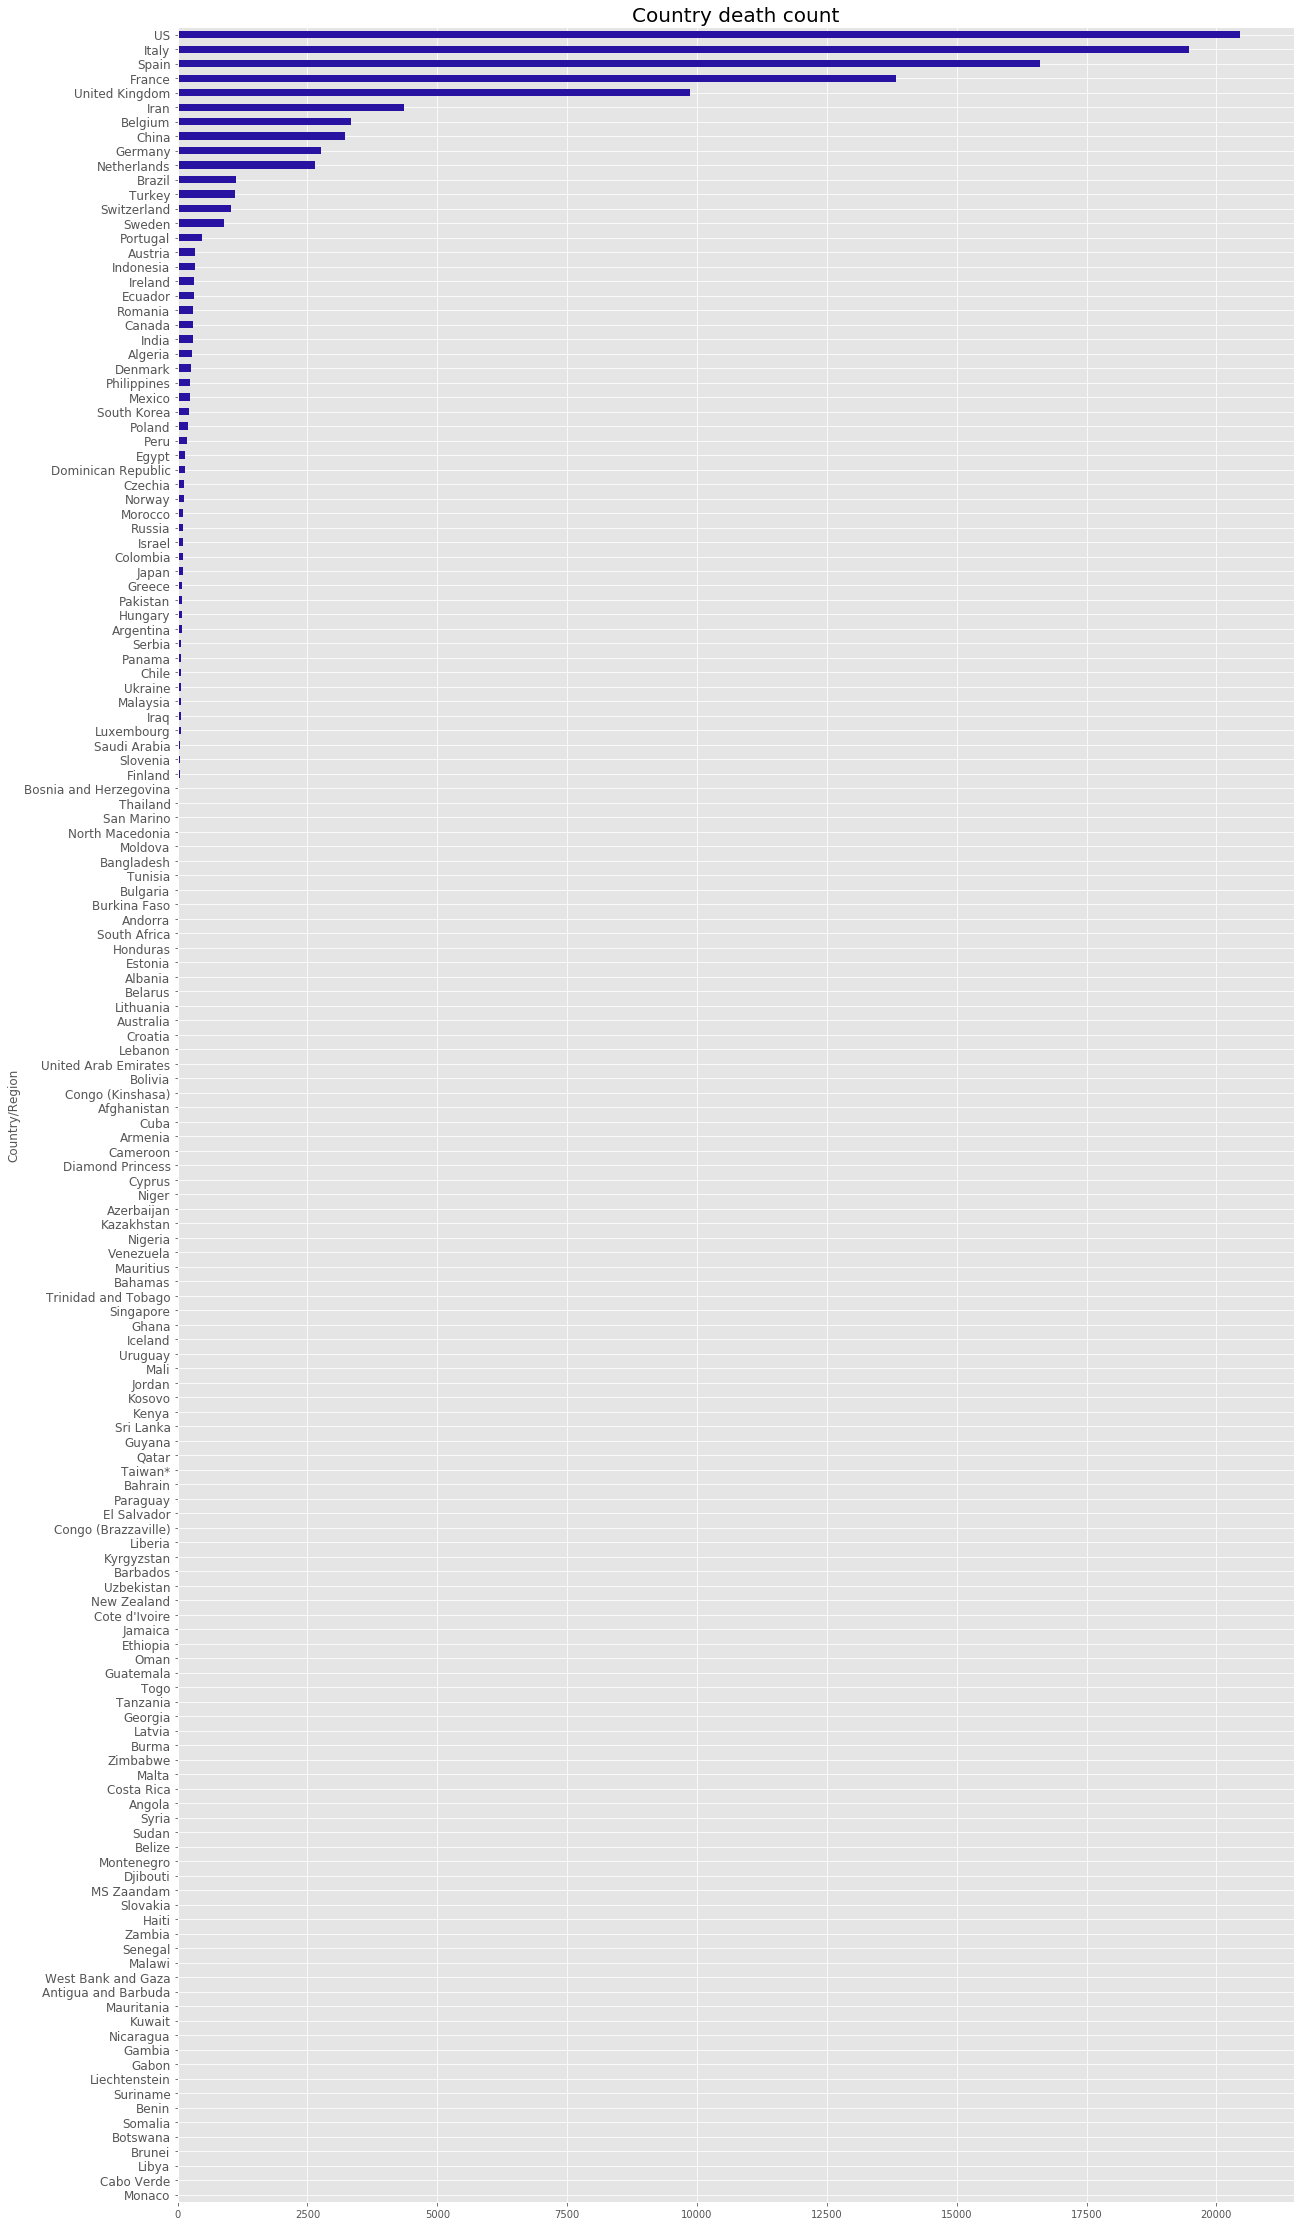

In [191]:
# Death count per country
plt.figure(figsize=[20,40])
plt.title('Country death count', fontsize = 20)
temp = Country_stats[Country_stats['Deaths']>0]
temp['Deaths'].sort_values(ascending=True).plot(kind="barh",color="#2812A1") 
plt.yticks(fontsize = 12)
plt.show()

In [192]:
# Dead count per citizens in country - Mangler beboer i landene

# Country wise death over time - Bokeh

In [310]:
# Focusing on top 24 countries by death rate. 
temp = Country_stats[Country_stats['Deaths']>250]
print(temp['Deaths'].sort_values(ascending=False).index)
FocusCountries = ['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran', 'Belgium',
       'China', 'Germany', 'Netherlands', 'Brazil', 'Turkey', 'Switzerland',
       'Sweden', 'Portugal', 'Austria', 'Indonesia', 'Ireland', 'Ecuador',
       'Romania', 'Canada', 'India', 'Algeria', 'Denmark']
#FocusCountries = ['US', 'Italy', 'Spain', 'France', 'United Kingdom']

Index(['US', 'Italy', 'Spain', 'France', 'United Kingdom', 'Iran', 'Belgium',
       'China', 'Germany', 'Netherlands', 'Brazil', 'Turkey', 'Switzerland',
       'Sweden', 'Portugal', 'Austria', 'Indonesia', 'Ireland', 'Ecuador',
       'Romania', 'Canada', 'India', 'Algeria', 'Denmark'],
      dtype='object', name='Country/Region')


In [311]:
#preparing for bohek chart of death distribution per focus country
Focus_Country_Time_stats = Country_Time_stats[Country_Time_stats['Country'].isin(FocusCountries)]
Bohek1 = Focus_Country_Time_stats['Deaths'].unstack().T
# Reseting index
Bohek1 = Bohek1.reset_index()
# Filtering
Bohek1 = pd.DataFrame(data=Bohek1)
# Printing
del Bohek1['Date']
# Reseting index
Bohek1 = Bohek1.reset_index()
Bohek1

Country/Region,index,Algeria,Austria,Belgium,Brazil,Canada,China,Denmark,Ecuador,France,...,Italy,Netherlands,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,76,193,243,2035,686,375,3335,203,191,10343,...,17127,2108,345,197,14045,591,821,725,12722,6171
77,77,205,273,2240,819,407,3337,218,242,10887,...,17669,2255,380,220,14792,687,895,812,14695,7111
78,78,235,295,2523,950,503,3339,237,272,12228,...,18279,2403,409,248,15447,793,948,908,16478,7993
79,79,256,319,3019,1057,557,3340,247,297,13215,...,18849,2520,435,270,16081,870,1002,1006,18586,8974


In [323]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import viridis
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.models.tools import HoverTool

In [324]:
output_notebook()

Loading BokehJS ...

In [701]:
source = ColumnDataSource(Bohek1)

In [702]:
date = source.data['index'].tolist()
date = [ str(x) for x in date ]

In [703]:
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]

p = figure(x_range = FactorRange(factors=date), plot_height=500, plot_width = 1000, title="Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in world',y_axis_label = 'Death toll',toolbar_location=None,tooltips=TOOLTIPS)

In [704]:
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors

# Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))

In [705]:
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')

p.xaxis.major_label_orientation =3.1415/2
show(p)

In [552]:
# Making double loop to count days since outbreak got to 5 confirmed people in country
#empty string
day_count = []
#outer counter
indx2 = 0
#loop over focus countries
for i in Focus_Country_Time_stats['Country'].unique():
    #inner counter
    indx1 = 1
    #loop over dates
    for d in range(0,len(Focus_Country_Time_stats['Date'].unique())):
        #if statement to only count when confirmed people hits 5 
        if Focus_Country_Time_stats.iloc[d+indx2,1] < 5: 
            day_count.append(0)
        else:
            day_count.append(indx1)
            indx1=indx1+1
            
    indx2=indx2+len(Focus_Country_Time_stats['Date'].unique())

# Adding the Dataframe
Focus_Country_Time_stats['DaysSinceOutbreak'] = day_count



/Users/kaspernielsen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [556]:
#Grouping by days since outbreak
Bohek2 = Focus_Country_Time_stats[["Deaths","DaysSinceOutbreak",'Country']].groupby(['Country',"DaysSinceOutbreak"]).sum()
Bohek2 = Bohek2.unstack().T
# Reseting index
Bohek2 = Bohek2.reset_index()
# Filtering
Bohek2 = pd.DataFrame(data=Bohek2)
# Printing
del Bohek2['DaysSinceOutbreak']
del Bohek2['level_0']
# Reseting index
Bohek2 = Bohek2.reset_index()
Bohek2

Country,index,Algeria,Austria,Belgium,Brazil,Canada,China,Denmark,Ecuador,France,...,Italy,Netherlands,Portugal,Romania,Spain,Sweden,Switzerland,Turkey,US,United Kingdom
0,0,18.0,14.0,17.0,4.0,11.0,NaN,14.0,13.0,32.0,...,6.0,12.0,6.0,3.0,6.0,8.0,18.0,9.0,2.0,12.0
1,1,7.0,6.0,5.0,6.0,5.0,17.0,6.0,5.0,6.0,...,7.0,5.0,6.0,7.0,5.0,6.0,11.0,9.0,6.0,6.0
2,2,9.0,6.0,10.0,11.0,8.0,18.0,9.0,7.0,9.0,...,10.0,5.0,12.0,11.0,10.0,7.0,13.0,30.0,7.0,8.0
3,3,11.0,8.0,14.0,15.0,9.0,26.0,13.0,14.0,11.0,...,12.0,10.0,14.0,17.0,17.0,10.0,14.0,37.0,11.0,8.0
4,4,15.0,16.0,21.0,25.0,12.0,42.0,13.0,18.0,19.0,...,17.0,12.0,23.0,23.0,28.0,11.0,14.0,44.0,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,77,NaN,NaN,NaN,NaN,NaN,3335.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,78,NaN,NaN,NaN,NaN,NaN,3337.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,79,NaN,NaN,NaN,NaN,NaN,3339.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,80,NaN,NaN,NaN,NaN,NaN,3340.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [706]:
source2 = ColumnDataSource(Bohek2)

In [707]:
days = source.data['index'].tolist()
days = [ str(x) for x in days ]

In [708]:
TOOLTIPS = [
    ("Day", "$index"),
    ("Country", "$name"),
    ("Deaths", "@$name"),
]
p = figure(x_range = FactorRange(factors=days), plot_height=500, plot_width = 1000, title="Logarithmic Country wise timeline of COVID-19 casualties",
           x_axis_label = 'Days since first death in country',y_axis_label = 'Death toll',toolbar_location=None,y_axis_type="log",tooltips=TOOLTIPS)


In [709]:
line = {}
items = []
coloring = viridis(len(FocusCountries)) # making list of different colors


#Render glyph
for indx,i in enumerate(FocusCountries):
    line[i] = p.line(x='index',  y=i, source=source2,line_width=2, muted_alpha=0.3,muted_line_color=coloring[indx],
                    line_color=coloring[indx], muted=True, name=i)
    items.append((i,[line[i]]))


In [710]:
legend1 = Legend(items=items[0:12],click_policy='mute')
legend2 = Legend(items=items[12:24],click_policy='mute')
p.add_layout(legend1,'left')
p.add_layout(legend2,'left')


p.xaxis.major_label_orientation =3.1415/2
show(p)

# Heatmaps

In [482]:
#Grouping by date and country to get comfirmed & deaths for the whole country inclusive regions
Date_Country_stats = df_corona[["Confirmed","Deaths","Recovered","Date","Country/Region"]].groupby(["Date","Country/Region"]).sum()
Date_Country_stats['Mortalityrate'] = Date_Country_stats['Deaths']/Date_Country_stats['Confirmed']
Date_Country_stats['LogDeaths'] = np.log(Date_Country_stats['Deaths']+1)

In [483]:
# Defining newest date
target_date = max(Date_Country_stats.index.get_level_values(0))
# Selecting the newest date only
Newest_Date_Country_stats = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == target_date]

In [486]:
# Plotting death count
import plotly.express as px
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',
                    title='World map of casaulties')
fig.show()

In [487]:
# Plotting Mortality rate
fig = px.choropleth(Newest_Date_Country_stats, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="Mortalityrate", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Mortalityrate'],range_color=[0, 0.25], 
                    color_continuous_scale=[[0, 'rgb(245,245,255)'], [1, 'rgb(0,0,255)']],
                    title='World map of Mortality Rate')
fig.show()

# GIF Heatmap

In [725]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [735]:
#install this
#conda install -c plotly plotly-orca==1.2.1 psutil requests
indx = 1
for d in Date_Country_stats.index.get_level_values(0).unique(): 
    
    temp = Date_Country_stats[Date_Country_stats.index.get_level_values(0) == d]
    fig = px.choropleth(temp, locations=Newest_Date_Country_stats.index.get_level_values(1), 
                    locationmode='country names', color="LogDeaths", 
                    hover_name=Newest_Date_Country_stats.index.get_level_values(1),
                    hover_data=["Confirmed", 'Deaths'],range_color=[0, max(Newest_Date_Country_stats["LogDeaths"])], 
                    color_continuous_scale='reds',
                    title='World map of casaulties ' + str(d))
    fig.write_image(str(indx) + ".png")
    indx=indx+1

In [742]:
import os
import imageio
images = []
files = os.listdir('./images')

for filename in range(1,len(files)):
    if filename != '.ipynb_checkpoints':
        images.append(imageio.imread('./images/' + str(filename)+ '.png'))
kargs = { 'duration': 0.5 }
imageio.mimsave('crime_evo_rain.gif', images, 'GIF', **kargs )